# <font color=blue>Assignments for "Simple Linear Regression"</font>

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the ["House Prices" dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) from Kaggle. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

**(1)** Investigate the data and do any necessary data cleaning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn import metrics
import math


In [2]:
data=pd.read_csv("E:/user/Notebooks/data/house-prices/train.csv", low_memory=False)


In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [4]:
#There are lots of null features we need to clean it.
display_all(data.isnull().sum().sort_index()*100/len(data))

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.767123
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtFinType1      2.534247
BsmtFinType2      2.602740
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
BsmtQual          2.534247
BsmtUnfSF         0.000000
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.068493
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
Fence            80.753425
FireplaceQu      47.260274
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.000000
GarageArea        0.000000
GarageCars        0.000000
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageType        5.547945
G

In [5]:
data=data.drop(['PoolQC','MiscFeature','Fence','Alley'], axis=1)

In [6]:
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        df[name] = col.fillna(col.median())    

In [7]:
for n, c in data.items():
        fix_missing(data, c, n)

In [8]:
display_all(data.isnull().sum().sort_index()*100/len(data))

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtFinType1      2.534247
BsmtFinType2      2.602740
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
BsmtQual          2.534247
BsmtUnfSF         0.000000
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.068493
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
FireplaceQu      47.260274
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.000000
GarageArea        0.000000
GarageCars        0.000000
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageType        5.547945
GarageYrBlt       0.000000
GrLivArea         0.000000
H

**(2)** Explore the data and find some variables that you think would be useful in the prediction of the house prices.


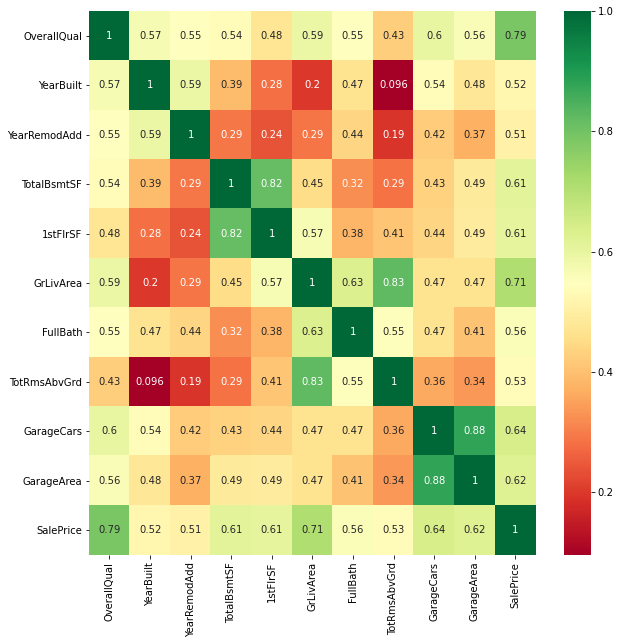

In [9]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

GrLivArea and OverralQual is more correlated with Saleprice so I chose these features to predict of houses prices.

**(3)** Build your initial model using these features and estimate the parameters using OLS.

In [10]:
from sklearn import linear_model

# Y is the target variable
Y = data['SalePrice']
# X is the feature set which includes
# is_male and is_smoker variables
X = data[['GrLivArea','OverallQual']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)



LinearRegression()

In [11]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:30:49   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.041e+05   5045.372    -20.631      0.000   -1.14e+05   -9.42e+04
GrLivArea      55.8622      2.630     21.242      0.000      50.704      61.021
OverallQual  3.285e+04    999.198     32.875      0.000    3.09e+04    3.48e+04
==============================================================================
Omnibus:                      341.985   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8725.150
Skew:                           0.469   Prob(JB):                         0.00
Kurtosis:                      14.939   Cond. No.                     7.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""